In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [344]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [345]:
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


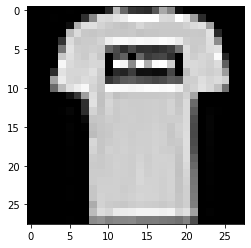

In [4]:
plt.imshow(X_train[1, :, :],cmap='gray')

<AxesSubplot:ylabel='count'>

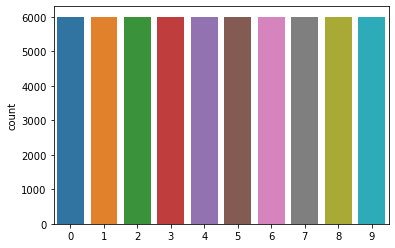

In [5]:
sns.countplot(y_train)

In [7]:
#No null value
pd.DataFrame(X).isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

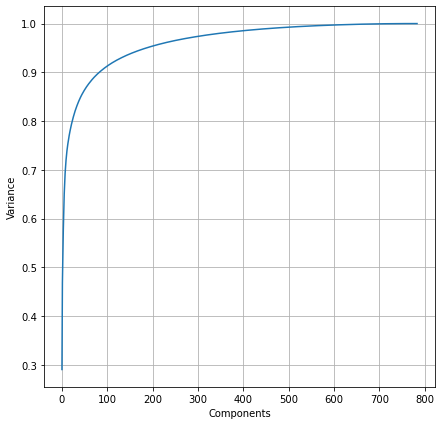

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

fig, ax = plt.subplots(figsize = (7,7))

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(ylabel = 'Variance', xlabel = 'Components')
ax.grid()

In [16]:
X = X_train.copy()
y = y_train.copy()
X = X.reshape(X.shape[0], X.shape[1]* X.shape[2])
X = X/255.0

In [46]:
train_set = pd.DataFrame(X)
train_label = pd.DataFrame({'Label': y})

In [47]:
train_full = pd.concat([train_set, train_label], axis = 1)

In [32]:
from scipy import ndimage, misc

In [139]:
pd.DataFrame(ndimage.rotate(X_train[0, :], 90).reshape(1, -1))

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,3,0,15,66,0,0,...,3,98,75,48,0,0,2,0,0,0


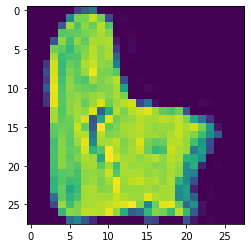

In [375]:
rotation = ndimage.rotate(X_train[0, :], 270)
plt.imshow(rotation)

In [313]:
sample_0 = train_full[train_full['Label'] == 0].sample(750)
sample_1 = train_full[train_full['Label'] == 1].sample(750)
sample_2 = train_full[train_full['Label'] == 2].sample(750)
sample_3 = train_full[train_full['Label'] == 3].sample(750)
sample_4 = train_full[train_full['Label'] == 4].sample(750)
sample_5 = train_full[train_full['Label'] == 5].sample(750)
sample_6 = train_full[train_full['Label'] == 6].sample(750)
sample_7 = train_full[train_full['Label'] == 7].sample(750)
sample_8 = train_full[train_full['Label'] == 8].sample(750)
sample_9 = train_full[train_full['Label'] == 9].sample(750)

In [319]:
def rotate(x):
    rotation = pd.DataFrame([])
    for i in range(250):
        img = x.iloc[i, :784].values.reshape(28, 28)
        rot = ndimage.rotate(img, 90).reshape(1, -1)
        r = pd.DataFrame(rot,  index = [0])
        rotation = rotation.append(r, ignore_index = True)
    for i in range(250, 500):
        img = x.iloc[i, :784].values.reshape(28, 28)
        rot = ndimage.rotate(img, 180).reshape(1, -1)
        r = pd.DataFrame(rot,  index = [0])
        rotation = rotation.append(r, ignore_index = True)
    for i in range(500, 750):
        img = x.iloc[i, :784].values.reshape(28, 28)
        rot = ndimage.rotate(img, 270).reshape(1, -1)
        r = pd.DataFrame(rot,  index = [0])
        rotation = rotation.append(r, ignore_index = True)
    return rotation

In [321]:
label = rotate(sample_1)

In [360]:
label['Label'] = 0

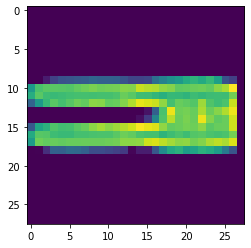

In [322]:
plt.imshow(label.iloc[500, : 784].values.reshape(28, 28))

In [358]:
np.insert(X_train, -1, values = label.iloc[:, :784].values.reshape(-1, 28, 28), axis = 0).shape

(60750, 28, 28)

In [365]:
np.insert(y_train, -1, label['Label'].values, axis = 0).shape

(60750,)

In [349]:
test = label.iloc[0, :].values.reshape(28, 28)

In [350]:
test.shape

(28, 28)